In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
from collections import Counter

In [3]:
df = pd.read_csv("zomato.csv")
df_orig = df.copy(deep = True)

## Basic Exploratory Data Analysis

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51717 entries, 0 to 51716
Data columns (total 17 columns):
url                            51717 non-null object
address                        51717 non-null object
name                           51717 non-null object
online_order                   51717 non-null object
book_table                     51717 non-null object
rate                           43942 non-null object
votes                          51717 non-null int64
phone                          50509 non-null object
location                       51696 non-null object
rest_type                      51490 non-null object
dish_liked                     23639 non-null object
cuisines                       51672 non-null object
approx_cost(for two people)    51371 non-null object
reviews_list                   51717 non-null object
menu_item                      51717 non-null object
listed_in(type)                51717 non-null object
listed_in(city)                51717 non-nul

In [5]:
df.isnull().sum()

url                                0
address                            0
name                               0
online_order                       0
book_table                         0
rate                            7775
votes                              0
phone                           1208
location                          21
rest_type                        227
dish_liked                     28078
cuisines                          45
approx_cost(for two people)      346
reviews_list                       0
menu_item                          0
listed_in(type)                    0
listed_in(city)                    0
dtype: int64

#### Observation: The columns rate, phone, location, rest_type, dish_liked, cuisines, approx_cost have missing values

In [6]:
df.head(3)

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8/5,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari


#### Observation: Even though attribute menu_item has no null entries but it has has empty lists entries which are basically Null.

## Individual Attribute Exploration and Basic Pre-processing

### URL

In [7]:
print(df["url"].nunique(), "URLs in data:", df["url"].unique())

51717 URLs in data: ['https://www.zomato.com/bangalore/jalsa-banashankari?context=eyJzZSI6eyJlIjpbNTg2OTQsIjE4Mzc1NDc0IiwiNTkwOTAiLCIxODM4Mjk0NCIsIjE4MjI0Njc2IiwiNTkyODkiLCIxODM3MzM4NiJdLCJ0IjoiUmVzdGF1cmFudHMgaW4gQmFuYXNoYW5rYXJpIHNlcnZpbmcgQnVmZmV0In19'
 'https://www.zomato.com/bangalore/spice-elephant-banashankari?context=eyJzZSI6eyJlIjpbIjU4Njk0IiwxODM3NTQ3NCwiNTkwOTAiLCIxODM4Mjk0NCIsIjE4MjI0Njc2IiwiNTkyODkiLCIxODM3MzM4NiJdLCJ0IjoiUmVzdGF1cmFudHMgaW4gQmFuYXNoYW5rYXJpIHNlcnZpbmcgQnVmZmV0In19'
 'https://www.zomato.com/SanchurroBangalore?context=eyJzZSI6eyJlIjpbIjU4Njk0IiwiMTgzNzU0NzQiLDU5MDkwLCIxODM4Mjk0NCIsIjE4MjI0Njc2IiwiNTkyODkiLCIxODM3MzM4NiJdLCJ0IjoiUmVzdGF1cmFudHMgaW4gQmFuYXNoYW5rYXJpIHNlcnZpbmcgQnVmZmV0In19'
 ...
 'https://www.zomato.com/bangalore/plunge-sheraton-grand-bengaluru-whitefield-hotel-convention-centre-whitefield-bangalore?context=eyJzZSI6eyJlIjpbIjE4NjAyNDc4IiwiMTgyOTAwNTIiLCI1ODM1NCIsIjE4NzQxMTI5IiwxODY2MTA0MCwiMTg2NjEwODQiLCIxODY5MDgzNyJdLCJ0IjoiUHVicyAmYW1wOyBCY

In [8]:
df.drop("url", axis=1, inplace=True)

#### Observation: The URL attribute has all unique entries and does not carry and patterns so it can be dropped from the dataframe

### Address

In [9]:
print(df["address"].nunique(), "addresses in data:", df["address"].unique())

11495 addresses in data: ['942, 21st Main Road, 2nd Stage, Banashankari, Bangalore'
 '2nd Floor, 80 Feet Road, Near Big Bazaar, 6th Block, Kathriguppe, 3rd Stage, Banashankari, Bangalore'
 '1112, Next to KIMS Medical College, 17th Cross, 2nd Stage, Banashankari, Bangalore'
 ...
 'Cessna Business Park, Sarjapur Ã\x83Â\x83Ã\x82Â\x83Ã\x83Â\x82Ã\x82Â\x83Ã\x83Â\x83Ã\x82Â\x82Ã\x83Â\x82Ã\x82Â\x82Ã\x83Â\x83Ã\x82Â\x83Ã\x83Â\x82Ã\x82Â\x82Ã\x83Â\x83Ã\x82Â\x82Ã\x83Â\x82Ã\x82Â\x96 Marathahalli Outer Ring Road, Kadubeesanahalli, Bellandur Post, Bengaluru, Karnataka'
 '44, Kodigehalli to Hoodi Main Road, Mahadevapura Post, KR Puram, Bangalore'
 '139/C1, Next To GR Tech Park, Pattandur Agrahara, ITPL, Main Road, Whitefield, Bangalore']


In [10]:
df.drop("address", axis=1, inplace=True)

#### Observations
 - We have only 11495 unique addresses in the data.
 - It indicates that certain restaurants with different URLs on Zomato function from the same address.
 - Also, since we have region information in the **listed_in(city)** attribute, we will drop the address column

### Name

In [11]:
print(df["name"].nunique(), "names in data:", df["name"].unique())

8792 names in data: ['Jalsa' 'Spice Elephant' 'San Churro Cafe' ... 'Nawabs Empire'
 'SeeYa Restaurant'
 'Plunge - Sheraton Grand Bengaluru Whitefield Hotel &...']


#### Observations:
 - We have data for 8792 restaurant, this would include restaurant chains.

In [12]:
restaurant_chains = df["name"].value_counts()

In [13]:
restaurant_chains

Cafe Coffee Day                96
Onesta                         85
Just Bake                      73
Empire Restaurant              71
Five Star Chicken              70
                               ..
Mouthful                        1
Hungry Folks Snacks Drinks      1
Ayesha Hotel                    1
Shahi Biryani                   1
The Shake Factory Originals     1
Name: name, Length: 8792, dtype: int64

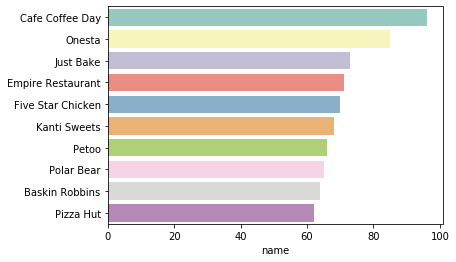

In [13]:
ax = sns.barplot(x = restaurant_chains[:10], y= restaurant_chains[:10].index, palette="Set3")

### The figure above shows the top 10 restaurant chains with maximum outlets. CCD dominates with close to 100 chains 

#### The attribute name also does not carry much information right now except allowing groupBy option, so we will drop it

In [14]:
df.drop("name", axis=1, inplace=True)

## Online order

In [15]:
print(df["online_order"].nunique(), "possibilities for Online ordering in data:", df["online_order"].unique())

2 possibilities for Online ordering in data: ['Yes' 'No']


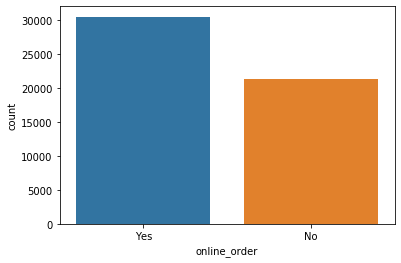

In [16]:
sns.countplot(df['online_order'])

## Observation : 30000+ restaurant accept online orders.

#### We will replace Yes with 1 and No with 0

In [17]:
df["online_order"] = df["online_order"].map({"Yes": 1, "No":0})

## Table Booking

In [18]:
print(df["book_table"].nunique(), "possibilities for Booking Table Online in data", df["book_table"].unique())

2 possibilities for Booking Table Online in data ['Yes' 'No']


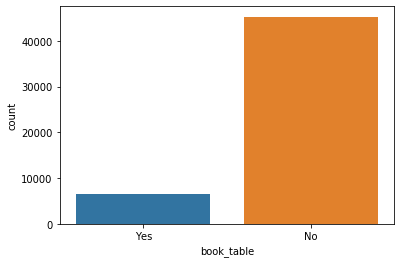

In [19]:
sns.countplot(df['book_table'])

## The figure above shows that more than 80% of the listed restaurants do not allow the provision of online table booking

#### We will replace Yes with 1 and No with 0

In [20]:
df["book_table"] = df["book_table"].map({"Yes": 1, "No":0})

## Rating

In [21]:
print(df["rate"].nunique(), "unique ratings", df["rate"].unique())

64 unique ratings ['4.1/5' '3.8/5' '3.7/5' '3.6/5' '4.6/5' '4.0/5' '4.2/5' '3.9/5' '3.1/5'
 '3.0/5' '3.2/5' '3.3/5' '2.8/5' '4.4/5' '4.3/5' 'NEW' '2.9/5' '3.5/5' nan
 '2.6/5' '3.8 /5' '3.4/5' '4.5/5' '2.5/5' '2.7/5' '4.7/5' '2.4/5' '2.2/5'
 '2.3/5' '3.4 /5' '-' '3.6 /5' '4.8/5' '3.9 /5' '4.2 /5' '4.0 /5' '4.1 /5'
 '3.7 /5' '3.1 /5' '2.9 /5' '3.3 /5' '2.8 /5' '3.5 /5' '2.7 /5' '2.5 /5'
 '3.2 /5' '2.6 /5' '4.5 /5' '4.3 /5' '4.4 /5' '4.9/5' '2.1/5' '2.0/5'
 '1.8/5' '4.6 /5' '4.9 /5' '3.0 /5' '4.8 /5' '2.3 /5' '4.7 /5' '2.4 /5'
 '2.1 /5' '2.2 /5' '2.0 /5' '1.8 /5']


In [22]:
print("Entries with hyphen - ", df.rate[df.rate == '-'].count())
print("Entries with NEW - ", df.rate[df.rate == 'NEW'].count())
print("Entries with nan - ", df.rate.isnull().sum())

Entries with hyphen -  69
Entries with NEW -  2208
Entries with nan -  7775


#### Replacing '-' and 'NEW' with NaN

In [23]:
df["rate"] = df.rate.replace('-', np.nan)
df["rate"] = df.rate.replace('NEW', np.nan)

#### Making ratings numeric and understandable

In [24]:
ratings = df.rate.dropna()
ratings = ratings.apply(lambda x : float(x.split('/')[0]))
print(ratings.mean())

3.7004488179527177


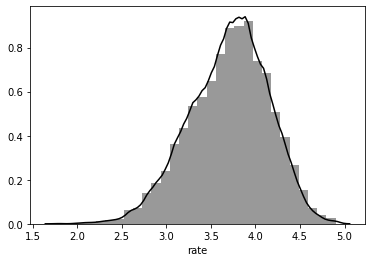

In [25]:
sns.distplot(ratings, bins=30, color='black')

### Observations
- Most of the restaurants have a rating between 3.5 and 4
- The ratings curve seems to be following Nornam Distributions under the specified conditions

### Replacing "New", "-", "NaN" with ratings mean

In [26]:
df["rate"] = df.rate.replace(np.nan, (str(ratings.mean()) + "/5"))

In [27]:
df["rate"]

0                       4.1/5
1                       4.1/5
2                       3.8/5
3                       3.7/5
4                       3.8/5
                 ...         
51712                  3.6 /5
51713    3.7004488179527177/5
51714    3.7004488179527177/5
51715                  4.3 /5
51716                  3.4 /5
Name: rate, Length: 51717, dtype: object

#### Converting rate attribute to numeric after NaN values have been filled

In [28]:
df["rate"] = df.rate.apply(lambda x : float(x.split('/')[0]))

In [29]:
df["rate"]

0        4.100000
1        4.100000
2        3.800000
3        3.700000
4        3.800000
           ...   
51712    3.600000
51713    3.700449
51714    3.700449
51715    4.300000
51716    3.400000
Name: rate, Length: 51717, dtype: float64

## Votes

In [30]:
print(df["votes"].nunique(), "unique votes", df["votes"].unique())

2328 unique votes [ 775  787  918 ... 4957 2382  843]


## Phone

In [31]:
print(df["phone"].nunique(), "unique phone numbers", df["phone"].unique())

14926 unique phone numbers ['080 42297555\r\n+91 9743772233' '080 41714161' '+91 9663487993' ...
 '+91 9663517066\n+91 9686861135' '+91 9164562939' '080 65951222']


## Observations
- Since only 14926 entries are present this indicates that multiple restaurants have registered with the same phone number.
- Also, presently phone number does not add up much information, so we will drop the attribute

In [32]:
df.drop("phone", axis = 1, inplace = True)

## Location

In [33]:
print(df["location"].nunique(), "unique locations", df["location"].unique())

93 unique locations ['Banashankari' 'Basavanagudi' 'Mysore Road' 'Jayanagar'
 'Kumaraswamy Layout' 'Rajarajeshwari Nagar' 'Vijay Nagar' 'Uttarahalli'
 'JP Nagar' 'South Bangalore' 'City Market' 'Nagarbhavi'
 'Bannerghatta Road' 'BTM' 'Kanakapura Road' 'Bommanahalli' nan
 'CV Raman Nagar' 'Electronic City' 'HSR' 'Marathahalli' 'Sarjapur Road'
 'Wilson Garden' 'Shanti Nagar' 'Koramangala 5th Block'
 'Koramangala 8th Block' 'Richmond Road' 'Koramangala 7th Block'
 'Jalahalli' 'Koramangala 4th Block' 'Bellandur' 'Whitefield'
 'East Bangalore' 'Old Airport Road' 'Indiranagar' 'Koramangala 1st Block'
 'Frazer Town' 'RT Nagar' 'MG Road' 'Brigade Road' 'Lavelle Road'
 'Church Street' 'Ulsoor' 'Residency Road' 'Shivajinagar' 'Infantry Road'
 'St. Marks Road' 'Cunningham Road' 'Race Course Road' 'Commercial Street'
 'Vasanth Nagar' 'HBR Layout' 'Domlur' 'Ejipura' 'Jeevan Bhima Nagar'
 'Old Madras Road' 'Malleshwaram' 'Seshadripuram' 'Kammanahalli'
 'Koramangala 6th Block' 'Majestic' 'Langford To

In [34]:
print("Entries with nan - ", df.location.isnull().sum())

Entries with nan -  21


In [35]:
location = df.location.value_counts()

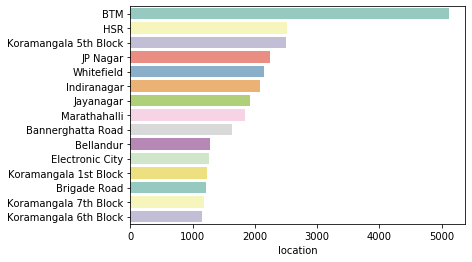

In [36]:
ax = sns.barplot(x = location[:15], y= location[:15].index, palette="Set3")

### Observation
BTM dominates in terms of number of restaurants

## Restaurant Type

In [37]:
print(df["rest_type"].nunique(), "unique restaurant types", df["rest_type"].unique())

93 unique restaurant types ['Casual Dining' 'Cafe, Casual Dining' 'Quick Bites' 'Casual Dining, Cafe'
 'Cafe' 'Quick Bites, Cafe' 'Cafe, Quick Bites' 'Delivery' 'Mess'
 'Dessert Parlor' 'Bakery, Dessert Parlor' 'Pub' 'Bakery'
 'Takeaway, Delivery' 'Fine Dining' 'Beverage Shop' 'Sweet Shop' 'Bar'
 'Beverage Shop, Quick Bites' 'Confectionery' 'Quick Bites, Beverage Shop'
 'Dessert Parlor, Sweet Shop' 'Bakery, Quick Bites'
 'Sweet Shop, Quick Bites' 'Kiosk' 'Food Truck'
 'Quick Bites, Dessert Parlor' 'Beverage Shop, Dessert Parlor' 'Takeaway'
 'Pub, Casual Dining' 'Casual Dining, Bar' 'Dessert Parlor, Beverage Shop'
 'Quick Bites, Bakery' 'Dessert Parlor, Quick Bites'
 'Microbrewery, Casual Dining' 'Lounge' 'Bar, Casual Dining' 'Food Court'
 'Cafe, Bakery' nan 'Dhaba' 'Quick Bites, Sweet Shop' 'Microbrewery'
 'Food Court, Quick Bites' 'Pub, Bar' 'Casual Dining, Pub' 'Lounge, Bar'
 'Food Court, Dessert Parlor' 'Casual Dining, Sweet Shop'
 'Food Court, Casual Dining' 'Casual Dining, Microbr

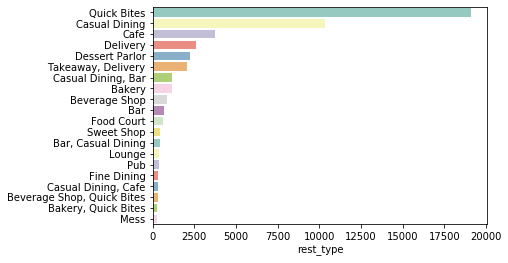

In [38]:
rest_type = df["rest_type"].value_counts()
ax = sns.barplot(x = rest_type[:20], y= rest_type[:20].index, palette="Set3")

### The plot above shows that Quick Bites and Casual Dining dominate the data

In [39]:
df_rest_type = df[df['rest_type'].notnull()]

### Some restaurant fall in multiple categories such as 'Cafe, Casual Dining'. Let's try and understand how many unique restaurant types are there.

In [40]:
rest_type = df_rest_type['rest_type']
rest_type_set = set()
for entry in rest_type:
    val = entry.split(',')
    for value in val:
        rest_type_set.add(value.strip())

In [41]:
rest_type_set

{'Bakery',
 'Bar',
 'Beverage Shop',
 'Bhojanalya',
 'Cafe',
 'Casual Dining',
 'Club',
 'Confectionery',
 'Delivery',
 'Dessert Parlor',
 'Dhaba',
 'Fine Dining',
 'Food Court',
 'Food Truck',
 'Irani Cafee',
 'Kiosk',
 'Lounge',
 'Meat Shop',
 'Mess',
 'Microbrewery',
 'Pop Up',
 'Pub',
 'Quick Bites',
 'Sweet Shop',
 'Takeaway'}

In [42]:
len(rest_type_set)

25

### Observation
There are 25 unique categories such that a restaurant can fall in one or more of these categories

### Replacing NaN with most frequent value in the restaurant type column

In [43]:
most_frequent_restaurant_type = df['rest_type'].mode().iloc[0]
print(most_frequent_restaurant_type)

Quick Bites


In [44]:
df['rest_type'] = df['rest_type'].fillna(most_frequent_restaurant_type)

## Dishes Liked

In [45]:
print(df["dish_liked"].nunique(), "unique dish_liked", df["dish_liked"].unique())

5271 unique dish_liked ['Pasta, Lunch Buffet, Masala Papad, Paneer Lajawab, Tomato Shorba, Dum Biryani, Sweet Corn Soup'
 'Momos, Lunch Buffet, Chocolate Nirvana, Thai Green Curry, Paneer Tikka, Dum Biryani, Chicken Biryani'
 'Churros, Cannelloni, Minestrone Soup, Hot Chocolate, Pink Sauce Pasta, Salsa, Veg Supreme Pizza'
 ...
 'Noodles, Chicken Noodle, Momos, American Chopsuey, Salad, Manchow Soup, Manchurian'
 'Chicken Quesadilla, Naan, Breakfast Buffet, Cheesecake, Cocktails, Lunch Buffet, Biryani'
 'Biryani, Andhra Meal']


In [46]:
df_dish_liked = df[df['dish_liked'].notnull()]

### Same dish can be liked at multiple restaurants. Let's try and understand how many unique dishes are being liked

In [47]:
unique_dishes = set()
for entry in df_dish_liked["dish_liked"]:
    s = entry.split()
    for item in s:
        unique_dishes.add(item)

In [48]:
len(unique_dishes)

1883

#### Dishes liked is not conveying much information and happens to be a highly sparse matrix, so we will drop the column

In [49]:
df.drop("dish_liked", axis=1, inplace=True)

## Cuisines

In [50]:
print(df["cuisines"].nunique(), "cuisines", df["cuisines"].unique())

2723 cuisines ['North Indian, Mughlai, Chinese' 'Chinese, North Indian, Thai'
 'Cafe, Mexican, Italian' ... 'North Indian, Street Food, Biryani'
 'Chinese, Mughlai' 'North Indian, Chinese, Arabian, Momos']


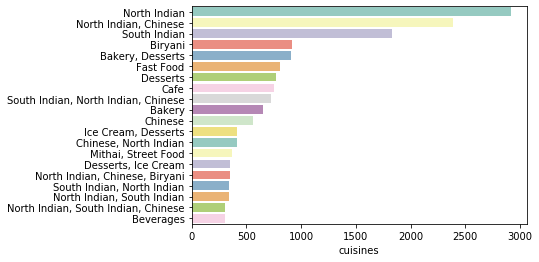

In [51]:
cuisines = df["cuisines"].value_counts()
ax = sns.barplot(x = cuisines[:20], y= cuisines[:20].index, palette="Set3")

In [52]:
df_cuisines = df[df['cuisines'].notnull()]

In [53]:
cuisines = df_cuisines['cuisines']

In [54]:
cuisines_set = set()
for entry in cuisines:
    val = entry.split(',')
    for value in val:
        cuisines_set.add(value.strip())

In [55]:
cuisines_set

{'Afghan',
 'Afghani',
 'African',
 'American',
 'Andhra',
 'Arabian',
 'Asian',
 'Assamese',
 'Australian',
 'Awadhi',
 'BBQ',
 'Bakery',
 'Bar Food',
 'Belgian',
 'Bengali',
 'Beverages',
 'Bihari',
 'Biryani',
 'Bohri',
 'British',
 'Bubble Tea',
 'Burger',
 'Burmese',
 'Cafe',
 'Cantonese',
 'Charcoal Chicken',
 'Chettinad',
 'Chinese',
 'Coffee',
 'Continental',
 'Desserts',
 'Drinks Only',
 'European',
 'Fast Food',
 'Finger Food',
 'French',
 'German',
 'Goan',
 'Greek',
 'Grill',
 'Gujarati',
 'Healthy Food',
 'Hot dogs',
 'Hyderabadi',
 'Ice Cream',
 'Indian',
 'Indonesian',
 'Iranian',
 'Italian',
 'Japanese',
 'Jewish',
 'Juices',
 'Kashmiri',
 'Kebab',
 'Kerala',
 'Konkan',
 'Korean',
 'Lebanese',
 'Lucknowi',
 'Maharashtrian',
 'Malaysian',
 'Malwani',
 'Mangalorean',
 'Mediterranean',
 'Mexican',
 'Middle Eastern',
 'Mithai',
 'Modern Indian',
 'Momos',
 'Mongolian',
 'Mughlai',
 'Naga',
 'Nepalese',
 'North Eastern',
 'North Indian',
 'Oriya',
 'Paan',
 'Pan Asian',
 'Pa

In [56]:
len(cuisines_set)

107

### Observation

- There are 107 different cuisines altogether such that a restaurant can serve 1 or more of these.

### Replacing NaN with most frequent value in the cuisines column

In [57]:
most_frequent_cuisine = df['cuisines'].mode().iloc[0]
print(most_frequent_cuisine)

North Indian


In [58]:
df['cuisines'] = df['cuisines'].fillna(most_frequent_cuisine)

## Approx Cost

In [59]:
print(df["approx_cost(for two people)"].nunique(), "cuisines", df["approx_cost(for two people)"].unique())

70 cuisines ['800' '300' '600' '700' '550' '500' '450' '650' '400' '900' '200' '750'
 '150' '850' '100' '1,200' '350' '250' '950' '1,000' '1,500' '1,300' '199'
 '80' '1,100' '160' '1,600' '230' '130' '50' '190' '1,700' nan '1,400'
 '180' '1,350' '2,200' '2,000' '1,800' '1,900' '330' '2,500' '2,100'
 '3,000' '2,800' '3,400' '40' '1,250' '3,500' '4,000' '2,400' '2,600'
 '120' '1,450' '469' '70' '3,200' '60' '560' '240' '360' '6,000' '1,050'
 '2,300' '4,100' '5,000' '3,700' '1,650' '2,700' '4,500' '140']


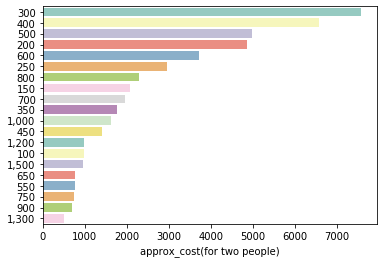

In [60]:
approx_cost = df["approx_cost(for two people)"].value_counts()
ax = sns.barplot(x = approx_cost[:20], y= approx_cost[:20].index, palette="Set3")

In [61]:
approx_cost = df['approx_cost(for two people)'].dropna().str.replace(',', '').astype(float)
print(approx_cost.mean())

555.4315664479959


In [62]:
df['approx_cost(for two people)'] = df['approx_cost(for two people)'].str.replace(',', '').astype(float)

In [63]:
df['approx_cost(for two people)'] = df['approx_cost(for two people)'].replace(np.nan, str(approx_cost.mean()))

In [64]:
df['approx_cost(for two people)']

0         800
1         800
2         800
3         300
4         600
         ... 
51712    1500
51713     600
51714    2000
51715    2500
51716    1500
Name: approx_cost(for two people), Length: 51717, dtype: object

## Reviews

#### Reviews carry a ot of textual information for us and this can be a separate task, so for this analysis we will drop the column.

In [65]:
df.drop("reviews_list", axis=1, inplace=True)

## Menu Items

In [66]:
print(df["menu_item"].nunique(), "menu items", df["menu_item"].unique())

9098 menu items ['[]'
 "['Chocolate Fantasy (Pack Of 5)', 'Pan Cake (Pack Of 6)', 'Gulab Jamun (Pack Of 10)', 'Gulkand Shot (Pack Of 5)', 'Chocolate Decadence (Pack of 2)', 'CheeseCake (Pack Of 2)', 'Red Velvet Slice Cake (Pack of 2)', 'Red Velvet Slice Cake & Cheese Cake (Pack of 2)', 'Red Velvet Slice Cake & Chocolate Decadence Cake (Pack of 2)', 'Hazelnut Brownie (Pack of 2)', 'Moments', 'Red Velvet Cake With Butter Cream Frosting (750 Gm)', 'Red Velvet Slice Cake (Pack of 2)', 'Red Velvet Slice Cake & Cheese Cake (Pack of 2)', 'Red Velvet Slice Cake & Chocolate Decadence Cake (Pack of 2)', 'Red Velvet Slice Cake (Pack of 1)', 'Valentine Red Velvet Jar', 'Valentine Chocolate Jar', 'Valentines Jar Combo', 'Pink Guava 500 ML', 'Oreo Vanilla 500 ML', 'Cookie Crumble 500 ML', 'Chocolate Fantasy', 'Gulkand-E-Bahar', 'Pan Cake', 'Hazelnut Brownie (Pack Of 1)', 'Gulab Jamun (Pack Of 2)', 'Plum Cake', 'Red Velvet Cake With Butter Cream Frosting (750 Gm)', 'Chocolate Mud Cake (700 Gms)', 'Ch

#### Observations

- Of the 51717 restaurants, only the menu items for 9000+ restaurant is available with us, so we will drop this column as this has more that 80% of the columns with no values
- Even though the entry is not Null or Nan, they empty menus are represented by blank lists

In [67]:
df.drop("menu_item", axis=1, inplace=True)

## Category listed in

In [68]:
print(df["listed_in(type)"].nunique(), "listings based on type", df["listed_in(type)"].unique())

7 listings based on type ['Buffet' 'Cafes' 'Delivery' 'Desserts' 'Dine-out' 'Drinks & nightlife'
 'Pubs and bars']


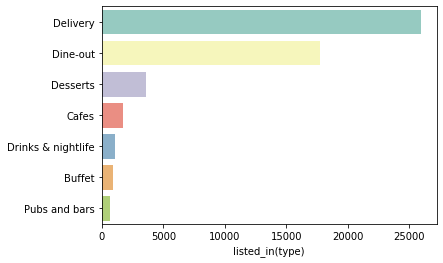

In [69]:
category_listed_in = df["listed_in(type)"].value_counts()
ax = sns.barplot(x = category_listed_in, y= category_listed_in.index, palette="Set3")

#### Observation
 - Most of the restaurants fall in the delivery category
 - Dine-out category is a close second

## Place Listed In

In [70]:
print(df["listed_in(city)"].nunique(), "listings based on city", df["listed_in(city)"].unique())

30 listings based on city ['Banashankari' 'Bannerghatta Road' 'Basavanagudi' 'Bellandur'
 'Brigade Road' 'Brookefield' 'BTM' 'Church Street' 'Electronic City'
 'Frazer Town' 'HSR' 'Indiranagar' 'Jayanagar' 'JP Nagar' 'Kalyan Nagar'
 'Kammanahalli' 'Koramangala 4th Block' 'Koramangala 5th Block'
 'Koramangala 6th Block' 'Koramangala 7th Block' 'Lavelle Road'
 'Malleshwaram' 'Marathahalli' 'MG Road' 'New BEL Road' 'Old Airport Road'
 'Rajajinagar' 'Residency Road' 'Sarjapur Road' 'Whitefield']


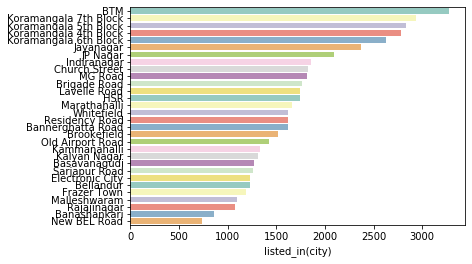

In [71]:
place_listed_in = df["listed_in(city)"].value_counts()
ax = sns.barplot(x = place_listed_in, y= place_listed_in.index, palette="Set3")

#### Observations
- BTM dominates in terms of number of restaurants.
- This attribute is pretty closely related to the Location attribute and for the same reason we will drop the **location** attribute and keep this
- More so location contains 93 entries compared to 30 here, this will be a comparitively less sparse matrix and also more abstracted in terms of place of restaurant
- Also, location has 21 NaN entries, hence keeping **Place Listed In** will be more beneficial

In [72]:
df.drop("location", axis = 1, inplace = True)

In [73]:
df.head(3)

,online_order,book_table,rate,votes,rest_type,cuisines,approx_cost(for two people),listed_in(type),listed_in(city)
0,1,1,4.1,775,Casual Dining,"North Indian, Mughlai, Chinese",800,Buffet,Banashankari
1,1,0,4.1,787,Casual Dining,"Chinese, North Indian, Thai",800,Buffet,Banashankari
2,1,0,3.8,918,"Cafe, Casual Dining","Cafe, Mexican, Italian",800,Buffet,Banashankari


## Pre-processing the Numeric and Categorical Attributes

### Applying Standard Scalar on numerical attributes

In [74]:
sc = StandardScaler()

In [75]:
df[['rate', 'votes', 'approx_cost(for two people)']] = sc.fit_transform(df[['rate', 'votes', 'approx_cost(for two people)']])

In [76]:
df.head(7)

,online_order,book_table,rate,votes,rest_type,cuisines,approx_cost(for two people),listed_in(type),listed_in(city)
0,1,1,1.010532,0.611201,Casual Dining,"North Indian, Mughlai, Chinese",0.559172,Buffet,Banashankari
1,1,0,1.010532,0.626130,Casual Dining,"Chinese, North Indian, Thai",0.559172,Buffet,Banashankari
2,1,0,0.251782,0.789099,"Cafe, Casual Dining","Cafe, Mexican, Italian",0.559172,Buffet,Banashankari
3,0,0,-0.001135,-0.243456,Quick Bites,"South Indian, North Indian",-0.584009,Buffet,Banashankari
4,0,0,0.251782,-0.146421,Casual Dining,"North Indian, Rajasthani",0.101900,Buffet,Banashankari
5,1,0,0.251782,0.002864,Casual Dining,North Indian,0.101900,Buffet,Banashankari
6,0,0,-0.254052,-0.342979,Casual Dining,"North Indian, South Indian, Andhra, Chinese",0.559172,Buffet,Banashankari


### We will LabelEncode the Categorical Attributes followed by OneHot Encoding

#### online_order and book_table are already One-Hot Encoded

### rest_type and cuisines

### For the attributes rest_type and cuisines, they will not be One Hot Encode them directly.

**Custom Encoding for them would be created.**

- **Restaurant type has 93 combinations but only 25 unique values as we had seen above.**
- **Cuisine has 2723 combinations but only 107 unique values as we had seen above.**

**The values would be split and their corresponding positions in the 25 dimensional and 107 dimensional encoding vector will be made 1 respectively.**

**This data would be concatenated with the original dataframe.**

**This would help in reducing dimensionality by (2723-107) + (93-25) = 2684 dimensions.**
**It would also lead to a way denser matrix and carry information in a better manner.**

In [77]:
cuisine_dict = {}
i = 0
for i, cuisine in enumerate(cuisines_set):
    cuisine_dict[cuisine] = i

In [78]:
cuisine_dict

{'Assamese': 0,
 'Hyderabadi': 1,
 'Tibetan': 2,
 'Arabian': 3,
 'Parsi': 4,
 'Jewish': 5,
 'Chettinad': 6,
 'Kerala': 7,
 'Vegan': 8,
 'Tea': 9,
 'Middle Eastern': 10,
 'Mughlai': 11,
 'Maharashtrian': 12,
 'Lebanese': 13,
 'Modern Indian': 14,
 'Mithai': 15,
 'Cantonese': 16,
 'Tamil': 17,
 'Burger': 18,
 'Continental': 19,
 'Mongolian': 20,
 'BBQ': 21,
 'Paan': 22,
 'Juices': 23,
 'Afghan': 24,
 'Chinese': 25,
 'Charcoal Chicken': 26,
 'Thai': 27,
 'Malaysian': 28,
 'Korean': 29,
 'Vietnamese': 30,
 'Japanese': 31,
 'Asian': 32,
 'Awadhi': 33,
 'Healthy Food': 34,
 'Kebab': 35,
 'Indian': 36,
 'Gujarati': 37,
 'Russian': 38,
 'Greek': 39,
 'Roast Chicken': 40,
 'Salad': 41,
 'Bakery': 42,
 'African': 43,
 'Coffee': 44,
 'Mediterranean': 45,
 'Naga': 46,
 'American': 47,
 'Sushi': 48,
 'Malwani': 49,
 'Tex-Mex': 50,
 'Turkish': 51,
 'Afghani': 52,
 'Street Food': 53,
 'Desserts': 54,
 'Kashmiri': 55,
 'South American': 56,
 'Nepalese': 57,
 'Lucknowi': 58,
 'Oriya': 59,
 'Bohri': 60,

In [79]:
def oneHotEncodeCuisine(data, cuisine_set, cuisine_dict):
    indexes = data.index
    cuisine_encoded_list = []
    for i, restaurant_cuisine in enumerate(data):
        val = restaurant_cuisine.split(',')
        l = [0]*len(cuisine_set)
        for value in val:
            l[cuisine_dict[value.strip()]] = 1
        cuisine_encoded_list.append(l)
    df = pd.DataFrame(cuisine_encoded_list, columns = cuisine_set, index = indexes)
    return df

In [80]:
oneHotEncodedCuisineDF = oneHotEncodeCuisine(df["cuisines"], cuisines_set, cuisine_dict)

In [81]:
oneHotEncodedCuisineDF.head(3)

,Assamese,Hyderabadi,Tibetan,Arabian,Parsi,Jewish,Chettinad,Kerala,Vegan,Tea,...,Fast Food,Ice Cream,Finger Food,Sri Lankan,French,Biryani,Indonesian,Momos,Goan,Bihari
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [82]:
df = pd.concat([df, oneHotEncodedCuisineDF], axis = 1)

In [83]:
df.pop('cuisines')

0                North Indian, Mughlai, Chinese
1                   Chinese, North Indian, Thai
2                        Cafe, Mexican, Italian
3                    South Indian, North Indian
4                      North Indian, Rajasthani
                          ...                  
51712                               Continental
51713                               Finger Food
51714                               Finger Food
51715                               Finger Food
51716    Finger Food, North Indian, Continental
Name: cuisines, Length: 51717, dtype: object

In [84]:
rest_type_set

{'Bakery',
 'Bar',
 'Beverage Shop',
 'Bhojanalya',
 'Cafe',
 'Casual Dining',
 'Club',
 'Confectionery',
 'Delivery',
 'Dessert Parlor',
 'Dhaba',
 'Fine Dining',
 'Food Court',
 'Food Truck',
 'Irani Cafee',
 'Kiosk',
 'Lounge',
 'Meat Shop',
 'Mess',
 'Microbrewery',
 'Pop Up',
 'Pub',
 'Quick Bites',
 'Sweet Shop',
 'Takeaway'}

In [85]:
restaurant_dict = {}
for i, restaurant in enumerate(rest_type_set):
    restaurant_dict[restaurant] = i

In [86]:
restaurant_dict

{'Bhojanalya': 0,
 'Club': 1,
 'Kiosk': 2,
 'Quick Bites': 3,
 'Pub': 4,
 'Meat Shop': 5,
 'Fine Dining': 6,
 'Bakery': 7,
 'Casual Dining': 8,
 'Bar': 9,
 'Irani Cafee': 10,
 'Cafe': 11,
 'Takeaway': 12,
 'Beverage Shop': 13,
 'Food Court': 14,
 'Sweet Shop': 15,
 'Microbrewery': 16,
 'Confectionery': 17,
 'Mess': 18,
 'Pop Up': 19,
 'Dessert Parlor': 20,
 'Food Truck': 21,
 'Delivery': 22,
 'Dhaba': 23,
 'Lounge': 24}

In [87]:
def oneHotEncodeRestaurant(data, restaurant_set, restaurant_dict):
    indexes = data.index
    restaurant_serving_encoded_list = []
    for i, restaurant_serving in enumerate(data):
        val = restaurant_serving.split(',')
        l = [0]*len(restaurant_set)
        for value in val:
            l[restaurant_dict[value.strip()]] = 1
        restaurant_serving_encoded_list.append(l)
    df = pd.DataFrame(restaurant_serving_encoded_list, columns = restaurant_set, index = indexes)
    return df

In [88]:
oneHotEncodedRestDF = oneHotEncodeRestaurant(df["rest_type"], rest_type_set, restaurant_dict)

In [89]:
oneHotEncodedRestDF.head(3)

,Bhojanalya,Club,Kiosk,Quick Bites,Pub,Meat Shop,Fine Dining,Bakery,Casual Dining,Bar,...,Sweet Shop,Microbrewery,Confectionery,Mess,Pop Up,Dessert Parlor,Food Truck,Delivery,Dhaba,Lounge
0,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [90]:
df = pd.concat([df, oneHotEncodedRestDF], axis = 1)

In [91]:
df.pop('rest_type')

0              Casual Dining
1              Casual Dining
2        Cafe, Casual Dining
3                Quick Bites
4              Casual Dining
                ...         
51712                    Bar
51713                    Bar
51714                    Bar
51715                    Bar
51716     Bar, Casual Dining
Name: rest_type, Length: 51717, dtype: object

### One Hot Encoding listed_in(type) and listed_in(city)

In [92]:
cat_columns = ["listed_in(type)", "listed_in(city)"]

In [93]:
le = LabelEncoder()
for col in cat_columns:
    print("Transforming column: ", col)
    df[col] = le.fit_transform(df[col])

Transforming column:  listed_in(type)
Transforming column:  listed_in(city)


In [94]:
df.head(3)

,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type),listed_in(city),Assamese,Hyderabadi,Tibetan,...,Sweet Shop,Microbrewery,Confectionery,Mess,Pop Up,Dessert Parlor,Food Truck,Delivery,Dhaba,Lounge
0,1,1,1.010532,0.611201,0.559172,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,1.010532,0.626130,0.559172,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0.251782,0.789099,0.559172,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [95]:
onehotencoder = OneHotEncoder(categorical_features = [5,6])
df = onehotencoder.fit_transform(df).toarray()

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/_encoders.py:415: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/_encoders.py:451: DeprecationWarning: The 'categorical_features' keyword is deprecated in version 0.20 and will be removed in 0.22. You can use the ColumnTransformer instead.
  "use the ColumnTransformer instead.", DeprecationWarning)


In [96]:
df.shape

(51717, 174)

In [97]:
kmeans = KMeans(n_clusters = 2, init = 'k-means++', random_state = 0)
kmeans.fit_predict(df)

array([1, 1, 1, ..., 1, 1, 1], dtype=int32)

In [98]:
labels = kmeans.labels_

In [99]:
labels

array([1, 1, 1, ..., 1, 1, 1], dtype=int32)

In [100]:
columns = df_orig.columns.values.tolist()
df_orig['clusters'] = labels
columns.extend(['clusters'])
columns

['url',
 'address',
 'name',
 'online_order',
 'book_table',
 'rate',
 'votes',
 'phone',
 'location',
 'rest_type',
 'dish_liked',
 'cuisines',
 'approx_cost(for two people)',
 'reviews_list',
 'menu_item',
 'listed_in(type)',
 'listed_in(city)',
 'clusters']

In [101]:
df_orig.head(3)

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city),clusters
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari,1
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari,1
2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8/5,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari,1


In [102]:
df_orig.to_csv('zomato_with_clusters.csv', index = False)

In [103]:
cluster_counter = Counter(labels)
print(cluster_counter)

Counter({0: 43153, 1: 8564})


In [104]:
silhouette_avg = silhouette_score(df, labels)
print("For n_clusters =", 2, "The average silhouette_score is :", silhouette_avg)

For n_clusters = 2 The average silhouette_score is : 0.28490910349979126


### We have got a decent Silhouette score of 0.29

## Conclusion and Future Work

1. Reviews and Dishes Liked can be used to create features so as to cater clustering. However, this can be treated as a separate task itself.
2. A lot of Exploratory Data Analysis can be performed where we pit in explore multiple attributes together such as using Crosstab etc.
3. We can create predictors to predict missing categorical values instead of filling them up with the mode.